In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import json
import shutil

In [2]:
images = tf.data.Dataset.list_files(r'C:\Users\saikr\Downloads\dataset\aug_data\validation\images\*.jpg')

In [3]:
images.as_numpy_iterator().next()

b'C:\\Users\\saikr\\Downloads\\dataset\\aug_data\\validation\\images\\FlightAltitude__9.9m_TemperatureInCenter__42C.14.jpg'

In [3]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [6]:
images.as_numpy_iterator().next()

array([[[84, 84, 84],
        [86, 86, 86],
        [83, 83, 83],
        ...,
        [86, 86, 86],
        [93, 93, 93],
        [92, 92, 92]],

       [[88, 88, 88],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [91, 91, 91],
        [94, 94, 94],
        [91, 91, 91]],

       [[88, 88, 88],
        [87, 87, 87],
        [91, 91, 91],
        ...,
        [92, 92, 92],
        [95, 95, 95],
        [92, 92, 92]],

       ...,

       [[22, 22, 22],
        [21, 21, 21],
        [22, 22, 22],
        ...,
        [85, 85, 85],
        [81, 81, 81],
        [73, 73, 73]],

       [[21, 21, 21],
        [22, 22, 22],
        [20, 20, 20],
        ...,
        [82, 82, 82],
        [75, 75, 75],
        [70, 70, 70]],

       [[20, 20, 20],
        [22, 22, 22],
        [20, 20, 20],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [70, 70, 70]]], dtype=uint8)

In [84]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [7]:
image_generator = images.batch(4).as_numpy_iterator()

In [15]:
plot_images = image_generator.next()

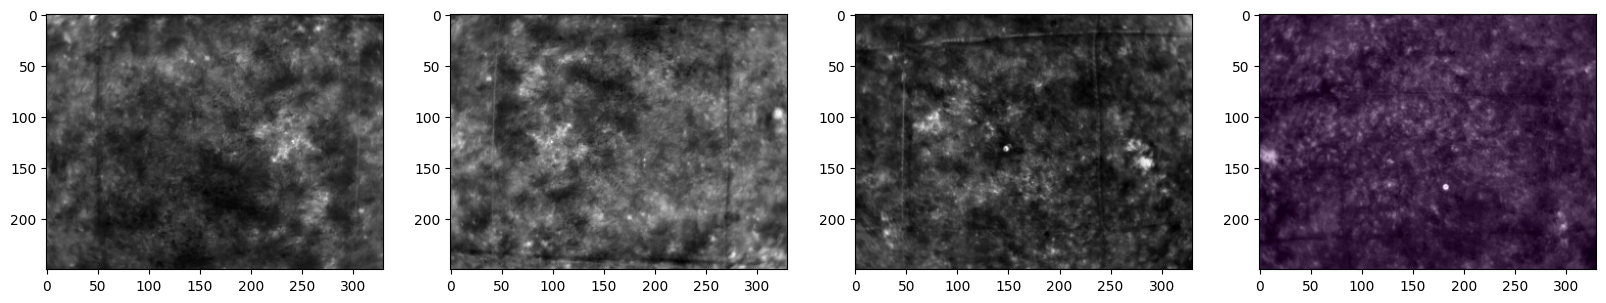

In [16]:
fig, ax = plt.subplots(ncols = 4, figsize=(20, 20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [36]:
import albumentations as alb

In [37]:
augmentor =alb.Compose([alb.RandomCrop(width=330, height=250),
                        alb.HorizontalFlip(p=0.5),
                        alb.RandomBrightnessContrast (p=0.2),
                        alb. RandomGamma(p=0.2),
                        alb.RGBShift(p=0.2), 
                        alb.VerticalFlip(p=0.5)],
                        bbox_params=alb.BboxParams(format='albumentations',
                                                   label_fields=['class_labels']))

In [41]:
img=cv2.imread('C:\\Users\\saikr\\Downloads\\dataset\\aug_data\\validation\\images\\FlightAltitude__9.9m_TemperatureInCenter__42C.14.jpg')

In [40]:
with open('C:\\Users\\saikr\\Downloads\\dataset\\aug_data\\validation\\labels\\FlightAltitude__9.9m_TemperatureInCenter__42C.14.json', 'r') as f:
    label=json.load(f)

In [43]:
label['bbox']

[0.5252106867491482,
 0.4788639053254438,
 0.5530034068495607,
 0.5356686390532545]

In [ ]:
coords=[0,0,0,0]
coords[0]=label['shapes'][0]['points'][0][0]
coords[1]=label['shapes'][0]['points'][0][1]
coords[2]=label['shapes'][0]['points'][1][0]
coords[3]=label['shapes'][0]['points'][1][1]
coords=list(np.divide(coords,[336,256,336,256]))
coords

[0.1843300929839392,
 0.32202292899408286,
 0.46962172442941674,
 0.6756656804733728]

In [ ]:
augmented=augmentor(image=img, bboxes=[coords], class_labels=['Landmine'])

In [ ]:
augmented['image']

array([[[38, 38, 38],
        [40, 40, 40],
        [41, 41, 41],
        ...,
        [63, 63, 63],
        [52, 52, 52],
        [45, 45, 45]],

       [[39, 39, 39],
        [40, 40, 40],
        [41, 41, 41],
        ...,
        [66, 66, 66],
        [50, 50, 50],
        [49, 49, 49]],

       [[40, 40, 40],
        [40, 40, 40],
        [41, 41, 41],
        ...,
        [64, 64, 64],
        [51, 51, 51],
        [48, 48, 48]],

       ...,

       [[21, 21, 21],
        [19, 19, 19],
        [21, 21, 21],
        ...,
        [36, 36, 36],
        [35, 35, 35],
        [36, 36, 36]],

       [[21, 21, 21],
        [20, 20, 20],
        [23, 23, 23],
        ...,
        [37, 37, 37],
        [37, 37, 37],
        [39, 39, 39]],

       [[21, 21, 21],
        [21, 21, 21],
        [23, 23, 23],
        ...,
        [36, 36, 36],
        [38, 38, 38],
        [40, 40, 40]]], dtype=uint8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(250, 330, 3)


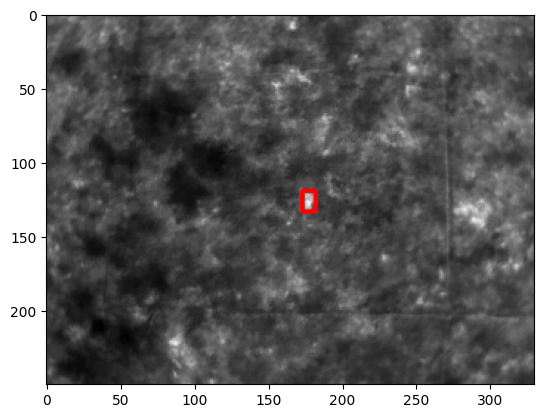

In [58]:
cv2.rectangle(img,
              tuple(np.multiply(label['bbox'][:2],[330,250]).astype(int)),
              tuple(np.multiply(label['bbox'][2:],[330,250]).astype(int)),
                    (255,0,0), 2)

plt.imshow(img)
print(img.shape)

In [ ]:
for i, image in enumerate(os.listdir(os.path.join('Landmine'))):
    if i<=106:
        img=cv2.imread(os.path.join('Landmine', image))
        cv2.imwrite(os.path.join('train', 'images', f'{image.split(".")[0]}.{image.split(".")[1]}.jpg'), img)
        label_path=os.path.join('labels',f'{image.split(".")[0]}.{image.split(".")[1]}.json')
        if os.path.exists(label_path):
            shutil.copy(label_path,os.path.join('train', 'labels'))
    elif i>106 and i<=136:
        img=cv2.imread(os.path.join('Landmine', image))
        cv2.imwrite(os.path.join('test', 'images', f'{image.split(".")[0]}.{image.split(".")[1]}.jpg'), img)
        label_path=os.path.join('labels',f'{image.split(".")[0]}.{image.split(".")[1]}.json')
        if os.path.exists(label_path):
            shutil.copy(label_path,os.path.join('test', 'labels'))
    else:
        img=cv2.imread(os.path.join('Landmine', image))
        cv2.imwrite(os.path.join('validation', 'images', f'{image.split(".")[0]}.{image.split(".")[1]}.jpg'), img)
        label_path=os.path.join('labels',f'{image.split(".")[0]}.{image.split(".")[1]}.json')
        if os.path.exists(label_path):
            shutil.copy(label_path,os.path.join('validation', 'labels'))

            
    

In [ ]:
for partition in ['train', 'test', 'validation']:
 for image in os.listdir(os.path.join(partition ,'images')):
  img=cv2.imread(os.path.join(partition,'images', image))
  coords=[0,0,0.00001,0.00001]
  label_path=os.path.join(partition,'labels',f'{image.split(".")[0]}.{image.split(".")[1]}.json')
  if os.path.exists(label_path):
    with open(label_path, 'r') as f:
      label=json.load(f)
    coords[0]=label['shapes'][0]['points'][0][0]
    coords[1]=label['shapes'][0]['points'][0][1]
    coords[2]=label['shapes'][0]['points'][1][0]
    coords[3]=label['shapes'][0]['points'][1][1]
    coords=list(np.divide(coords,[336,256,336,256]))
  try:
    for x in range(30):
      augmented=augmentor(image=img, bboxes=[coords], class_labels=['Landmine'])
      cv2.imwrite(os.path.join('aug_data',partition, 'images', f'{image.split(".")[0]}.{image.split(".")[1]}.{x}.jpg'), augmented['image'])
      annotation={}
      annotation['image'] = image
      if os.path.exists(label_path):
        if len(augmented['bboxes']) == 0:
          annotation ['bbox'] = [0,0,0,0]
          annotation['class'] = 0
        else:
          annotation['bbox'] = augmented['bboxes'][0]
          annotation['class']=1
      else:
        annotation['bbox'] = [0,0,0,0]
        annotation['class'] = 0

      with open(os.path.join('aug_data',partition, 'labels', f'{image.split(".")[0]}.{image.split(".")[1]}.{x}.json'), 'w') as f:
        json.dump(annotation, f)

  except Exception as e:
    print(e)
      

image must be numpy array type


In [4]:
train_images=tf.data.Dataset.list_files(r'test1\images\*.jpg',shuffle=False)
train_images=train_images.map(load_image)
train_images=train_images.map(lambda x:tf.image.resize(x,(120,120)))
train_images=train_images.map(lambda x: x/255)

In [5]:
test_images=tf.data.Dataset.list_files(r'C:\Users\saikr\Downloads\dataset\aug_data\test\images\*.jpg',shuffle=False)
test_images=test_images.map(load_image)
test_images=test_images.map(lambda x:tf.image.resize(x,(120,120)))
test_images=test_images.map(lambda x: x/255)

In [6]:
val_images=tf.data.Dataset.list_files(r'C:\Users\saikr\Downloads\dataset\aug_data\validation\images\*.jpg',shuffle=False)
val_images=val_images.map(load_image)
val_images=val_images.map(lambda x:tf.image.resize(x,(120,120)))
val_images=val_images.map(lambda x: x/255)

In [7]:
def load_labels(x):
    with open(x.numpy(),'r',encoding="utf-8") as f:
        label=json.load(f)
    return [label['class']],label['bbox']

In [6]:
train_labels=tf.data.Dataset.list_files(r'test1\labels\*.json',shuffle=False)
train_labels=train_labels.map(lambda x:tf.py_function(load_labels,[x], [tf.uint8, tf.float16]))

In [8]:
test_labels=tf.data.Dataset.list_files(r'C:\Users\saikr\Downloads\dataset\aug_data\test\labels\*.json',shuffle=False)
test_labels=test_labels.map(lambda x:tf.py_function(load_labels,[x], [tf.uint8, tf.float16]))

In [9]:
val_labels=tf.data.Dataset.list_files(r'C:\Users\saikr\Downloads\dataset\aug_data\validation\labels\*.json',shuffle=False)
val_labels=val_labels.map(lambda x:tf.py_function(load_labels,[x], [tf.uint8, tf.float16]))

In [12]:

testsize=int(len(test_images))
valsize=int(len(train_images)*.12)
trainsize=int(len(train_images)*.88)
print(valsize+testsize+trainsize)
trainsize,testsize, valsize

4889


(3352, 1080, 457)

In [9]:
train=tf.data.Dataset.zip((train_images,train_labels))
train=train.shuffle(4000)
val=train.skip(trainsize).take(valsize)
train=train.take(trainsize)
train=train.batch(8)
train=train.prefetch(4)
val=val.batch(8)
val=val.prefetch(4)
len(train),len(val)


(419, 58)

In [12]:
val=tf.data.Dataset.zip((val_images,val_labels))
val=val.shuffle(1000)
val=val.take(valsize)
val=val.batch(8)
val=val.prefetch(4)

In [13]:
test=tf.data.Dataset.zip((test_images,test_labels))
test=test.shuffle(1000)
test=test.take(testsize)
test=test.batch(8)
test=test.prefetch(4)
len(test)

135

In [11]:
data_sample=train.as_numpy_iterator()

In [14]:
res=data_sample.next()


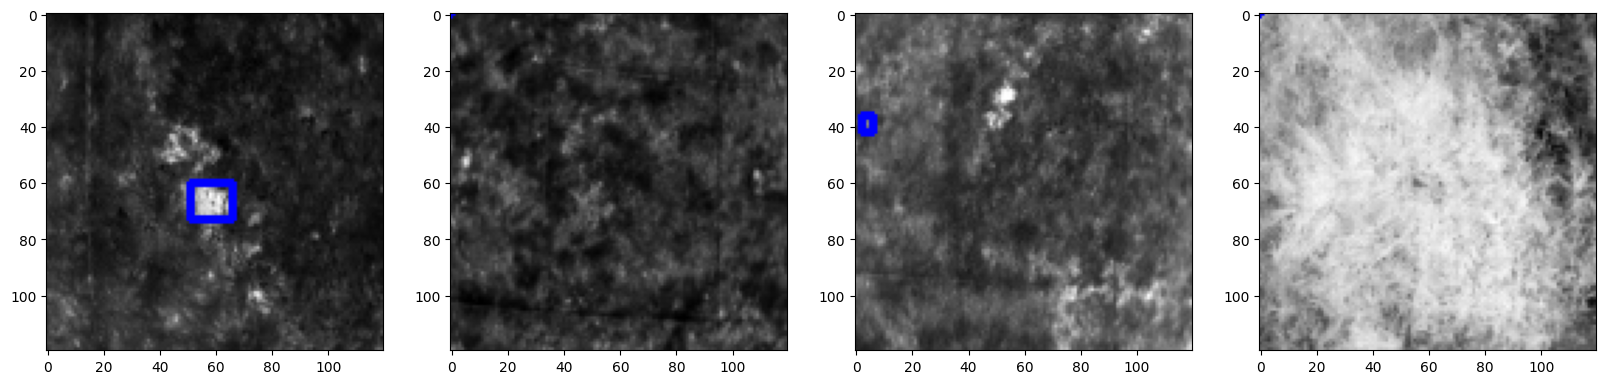

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = res[0][idx].copy()  # Make a copy of the image to avoid modifying the original
    sample_coords = res[1][1][idx]
    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                  (1,0,0), 2)

    ax[idx].imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
plt.show()


In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D, MaxPooling2D,Input
from tensorflow.keras.applications import VGG16, ResNet50

In [29]:
def build_model():
    input_layer=Input(shape=(120,120,3))
    vgg= VGG16(include_top=False)(input_layer)
    f1=GlobalMaxPooling2D()(vgg)
    class1=Dense(2048,activation='relu')(f1)
    class2=Dense(1,activation='sigmoid',name='class2')(class1)
    f2=GlobalMaxPooling2D()(vgg)
    regress1=Dense(2048,activation='relu')(f2)
    regress2=Dense(4,activation='sigmoid',name='regress2')(regress1)

    landeminetracker=Model(inputs=input_layer,outputs=[class2,regress2])
    return landeminetracker


In [21]:
from tensorflow.keras import layers, Model

def custom_resnet50():
    # Load the ResNet50 model with pre-trained weights
    resnet50 = ResNet50(weights='imagenet', input_shape=(120,120,3), include_top=False)

    # Freeze the weights of the ResNet50 layers
    resnet50.trainable = False
    # Add custom layers for class prediction
    x = layers.GlobalAveragePooling2D()(resnet50.output)
    class1=Dense(2048,activation='relu')(x)
    class2 = layers.Dense(1, activation='sigmoid', name='class2')(class1)

    # Add custom layers for bounding box prediction
    y = layers.GlobalAveragePooling2D()(resnet50.output)
    regress1=Dense(2048,activation='relu')(y)
    regress2 = layers.Dense(4, activation='linear', name='regress2')(regress1)

    # Create a model with the ResNet50 backbone and custom output layers
    model = Model(inputs=resnet50.input, outputs=[class2, regress2])

    return model

# Example usage:# Example input shape
model = custom_resnet50()


In [30]:
tracker=build_model()

In [31]:
tracker.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 3, 3, 512) │ 14,714,688 │ input_layer_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ class2 (Dense)      │ (None, 1)         │      2,049 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ regress2 (Dense)    │ (None, 4)         │      8,196 │ dense_3[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
X, y=train.as_numpy_iterator().next()

In [27]:
classes, coords=model.predict(X)
tf.data.experimental.enable_debug_mode()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [28]:
classes, coords

(array([[0.6187672 ],
        [0.61631894],
        [0.6124429 ],
        [0.6169088 ],
        [0.6185965 ],
        [0.6146599 ],
        [0.61864567],
        [0.6120043 ]], dtype=float32),
 array([[ 0.16549116, -0.06883225, -0.21719196,  0.67154276],
        [ 0.16938977, -0.07902156, -0.22042572,  0.662081  ],
        [ 0.1583379 , -0.07731764, -0.22925383,  0.6516208 ],
        [ 0.16784766, -0.07526308, -0.20460847,  0.6518165 ],
        [ 0.16890785, -0.07403877, -0.20031567,  0.67130154],
        [ 0.1568609 , -0.07012684, -0.22554064,  0.6631268 ],
        [ 0.16574524, -0.07479075, -0.21385193,  0.6579244 ],
        [ 0.15777557, -0.07127251, -0.21713719,  0.6500301 ]],
       dtype=float32))

In [19]:
batches_per_epoch=len(train)
lr_decay=(1./0.75-1)/batches_per_epoch
initial_learning_rate = 0.001
total_epochs = 10
end_learning_rate = 0.0001

decay_steps = total_epochs * 51 
lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=decay_steps,
    end_learning_rate=end_learning_rate,
    power=0.5
)

In [20]:
opt=tf.keras.optimizers.Adam(learning_rate=lr_schedule )

In [17]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2]-yhat[:,:2]))

    h_true =y_true[:,3]-y_true[:,1]
    w_true =y_true[:, 2]-y_true[:,0]

    h_pred =yhat[:,3]-yhat[:,1]
    w_pred =yhat[:,2]-yhat[:,0]

    delta_size=tf.reduce_sum(tf.square(w_true-w_pred) + tf.square(h_true-h_pred))

    return delta_coord+delta_size

In [30]:

classloss=tf.keras.losses.BinaryCrossentropy()

In [86]:
model=Tracker(tracker)
model.compile(opt,classloss,localization_loss)

In [70]:
'''tracker.compile(optimizer=opt ,
                loss={'class2':'binary_crossentropy','regress2':localization_loss},
                metrics={'class2':'accuracy','regress2':'mse'})'''
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss={'class2': 'binary_crossentropy', 'regress2':localization_loss},
              metrics={'class2': 'accuracy', 'regress2 ': 'mse'})

NameError: name 'model' is not defined

In [69]:
hist=model1.fit(train, epochs=1,validation_data=val)

419/419 ━━━━━━━━━━━━━━━━━━━━ 422s 989ms/step - class2_accuracy: 1.0000 - loss: 0.0049 - regress2_mse: 0.0046 - val_class2_accuracy: 1.0000 - val_loss: 0.0048 - val_regress2_mse: 0.0048


In [86]:
accuracy=model.evaluate(test)

135/135 ━━━━━━━━━━━━━━━━━━━━ 38s 266ms/step - class2_accuracy: 0.9981 - loss: 0.0150 - regress2_mse: 0.0063


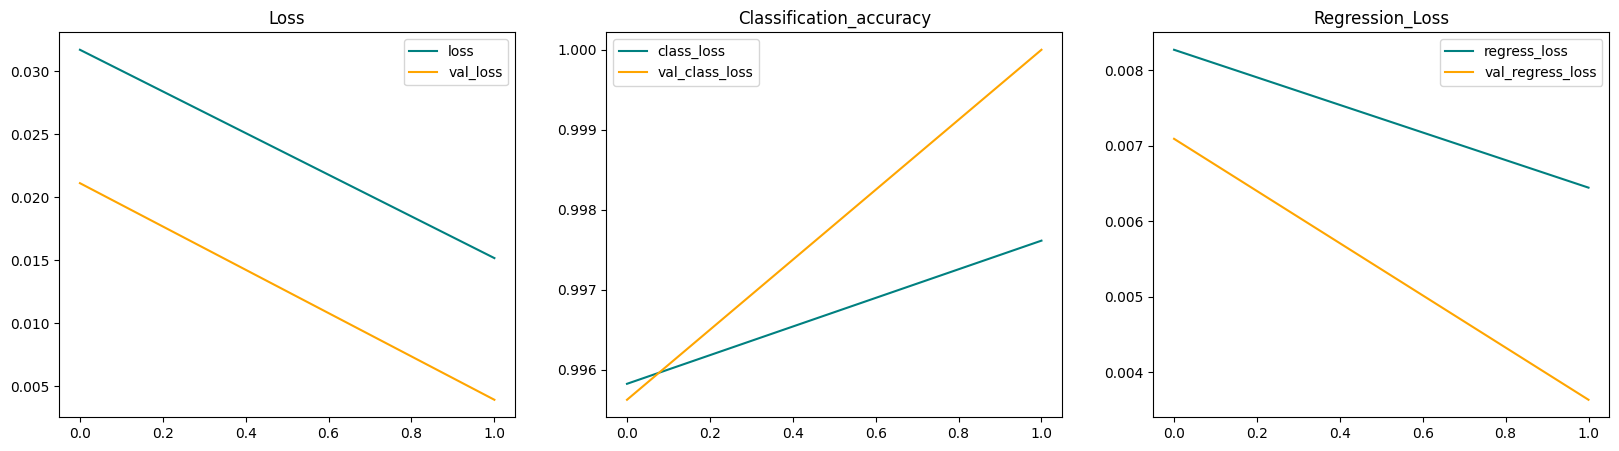

In [56]:
fig, ax= plt.subplots (ncols=3, figsize=(20,5))

ax[0].plot(hist.history['loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_loss'], color='orange', label='val_loss')
ax[0].title.set_text('Loss') 
ax[0].legend()

ax[1].plot(hist.history['class2_accuracy'], color='teal', label='class_loss')
ax[1].plot(hist.history['val_class2_accuracy'], color='orange', label='val_class_loss')
ax[1].title.set_text('Classification_accuracy')
ax[1].legend()

ax[2].plot(hist.history['regress2_mse'], color='teal', label='regress_loss')
ax[2].plot(hist.history['val_regress2_mse'], color='orange', label='val_regress_loss')
ax[2].title.set_text('Regression_Loss')
ax[2].legend()

plt.show()

In [40]:
tf.config.run_functions_eagerly(True)

In [20]:
data=test.as_numpy_iterator()

In [21]:
tf.data.experimental.enable_debug_mode()

In [24]:

test_data=data.next()
yhat=model.predict(test_data[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


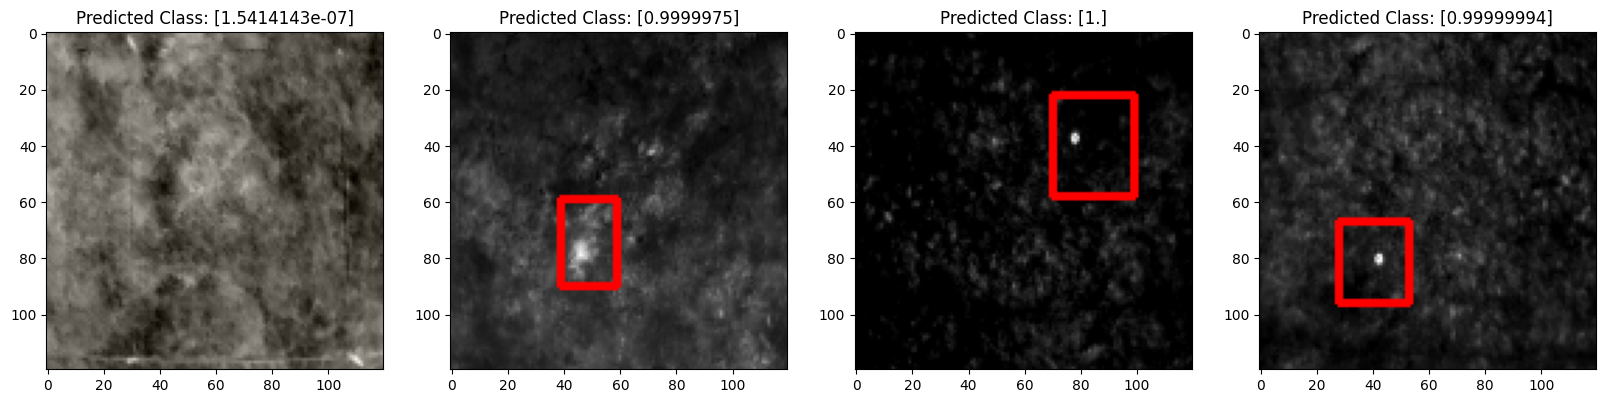

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image=test_data[0][idx].copy()
    sample_coords=yhat[1][idx]
    if yhat[0][idx] > 0.5:
        cv2.rectangle(sample_image,
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords [2:], [120,120]).astype(int)),
                      (255,0,0), 2)

    ax[idx].imshow(sample_image)
    ax[idx].set_title(f"Predicted Class: {yhat[0][idx]}")

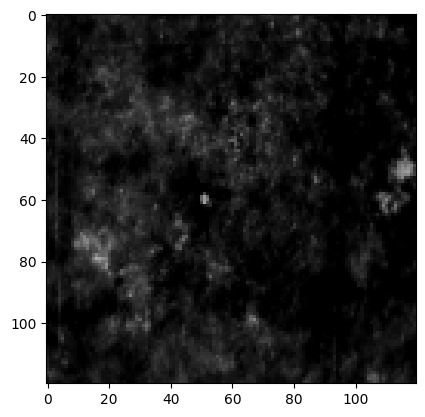

In [120]:
plt.imshow(test_data[0][3])

In [15]:
from tensorflow.keras.models import load_model

In [39]:
model.save('tracker7.keras')


In [18]:

model = load_model('tracker6.keras', custom_objects={'localization_loss': localization_loss})



In [87]:
accuracy

[0.024325909093022346, 0.9953703880310059, 0.007136160042136908]

In [55]:
accuracy

[0.03921530395746231, 0.9916666746139526, 0.007251705043017864]

In [72]:
accuracy

[0.03351699188351631, 0.9916666746139526, 0.006415374111384153]

In [10]:
cap=cv2.VideoCapture(1)
while cap.isOpened():
    _,frame=cap.read()
    frame=frame[50:500, 50:500,:]
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) 
    resized=tf.image.resize(rgb, (120,120))
    yhat=model.predict(np.expand_dims(resized/255,0))
    sample_coords= yhat[1][0]
    if yhat[0]>0.5:
        cv2.rectangle(frame,
                       tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                       tuple(np.multiply(sample_coords [2:], [450,450]).astype(int)),
                            (255,0,0), 2)
        cv2.rectangle(frame,
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                   [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                   [80,0])),
                            (255,0,0), -1)
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords [:2], [450,450]).astype(int), 
                    [0,-5])),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE, AA)

    cv2.imshow('EyeTrack', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()